In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coco-car-damage-detection-dataset/val/8.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/42.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/62.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/COCO_mul_val_annos.json
/kaggle/input/coco-car-damage-detection-dataset/val/COCO_val_annos.json
/kaggle/input/coco-car-damage-detection-dataset/val/9.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/1.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/22.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/24.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/74.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/32.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/3.jpg
/kaggle/input/coco-car-damage-detection-dataset/val/78.jpg
/kaggle/input/coco-car-damage-detection-dataset/test/45.jpg
/kaggle/input/coco-car-damage-detection-dataset/test/67.jpg
/kaggle/input/coco-car-damage-detection-dataset/test/60.jpg
/kaggle/input/coco-car-dama

In [2]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-rwc50u9_
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-rwc50u9_
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=272559 sha256=764389274d7235f80d07c956179e1856ce4289a7b6751d07dfd2a28f5302a9a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-2_2clyn4/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools


In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

In [4]:
data_directory='../input/coco-car-damage-detection-dataset/val'
data_type='COCO_val_annos'
multiple_data_types='COCO_mul_val_annos'
ann_file='{}/{}.json'.format(data_directory,data_type)
multiple_ann_files='{}/{}.json'.format(data_directory,multiple_data_types)
image_directory = "../input/coco-car-damage-detection-dataset/img"

In [5]:
# initialize coco api for instance annotations
coco=COCO(ann_file)
multiple_coco=COCO(multiple_ann_files)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [6]:
# display categories and supercategories

#Single Class #Damage dataset
categories = coco.loadCats(coco.getCatIds())
names=[category['name'] for category in categories]
print('COCO categories for damages: \n{}\n'.format(', '.join(names)))

names = set([category['supercategory'] for category in categories])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(names)))

#Multi Class #Parts dataset

multiple_categories = multiple_coco.loadCats(multiple_coco.getCatIds())
multiple_names=[category['name'] for category in multiple_categories]
print('COCO categories for parts: \n{}\n'.format(', '.join(multiple_names)))

multiple_names = set([multiple_category['supercategory'] for multiple_category in multiple_categories])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(multiple_names)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [7]:
# get all images containing 'damage' category, select one at random
category_Ids = coco.getCatIds(catNms=['damage']);
image_Ids = coco.getImgIds(catIds=category_Ids );

In [8]:
print(category_Ids)

[1]


In [9]:
print(image_Ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [10]:
random_image_id = random.choice(image_Ids)
print("{} image id was selected at random from the {} list".format(random_image_id, image_Ids))

4 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [11]:
# Load the image
image_Id = coco.getImgIds(imgIds = [random_image_id])
image = coco.loadImgs(image_Id)[0]
print("Image details \n",image)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '32.jpg', 'flickr_url': '', 'height': 1024, 'id': 4, 'license': 1, 'width': 1024}


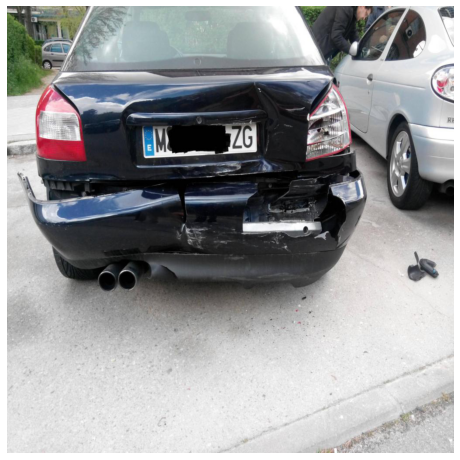

In [12]:
I = io.imread(image_directory + '/' + image['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [13]:
#get damage annotations
annotation_Ids = coco.getAnnIds(imgIds=image_Id,iscrowd=None)
annotation_files = coco.loadAnns(annotation_Ids)

In [14]:
print(annotation_Ids)

[7, 8, 9, 10]


In [15]:
print(annotation_files)

[{'area': 6347.999999999993, 'bbox': [31, 382, 378, 182], 'category_id': 1, 'id': 7, 'image_id': 4, 'iscrowd': 0, 'segmentation': [[31, 382, 49, 392, 64, 431, 78, 442, 118, 445, 170, 436, 185, 436, 233, 430, 277, 424, 310, 418, 350, 429, 391, 430, 399, 453, 409, 480, 396, 530, 375, 541, 318, 548, 260, 556, 219, 558, 147, 564, 120, 553, 88, 534, 72, 501, 57, 479, 42, 431]]}, {'area': 3660.000000000005, 'bbox': [446, 172, 183, 121], 'category_id': 1, 'id': 8, 'image_id': 4, 'iscrowd': 0, 'segmentation': [[446, 230, 454, 202, 476, 186, 520, 183, 563, 172, 598, 182, 618, 227, 629, 254, 616, 281, 599, 293, 587, 282, 585, 264, 568, 243, 545, 234, 497, 234, 462, 238, 454, 237]]}, {'area': 1439.9999999959396, 'bbox': [417, 318, 410, 244], 'category_id': 1, 'id': 9, 'image_id': 4, 'iscrowd': 0, 'segmentation': [[417, 366, 513, 357, 577, 352, 612, 349, 662, 358, 722, 358, 786, 318, 788, 335, 802, 326, 801, 367, 813, 378, 814, 391, 827, 434, 813, 478, 780, 538, 765, 549, 693, 560, 609, 562, 561, 

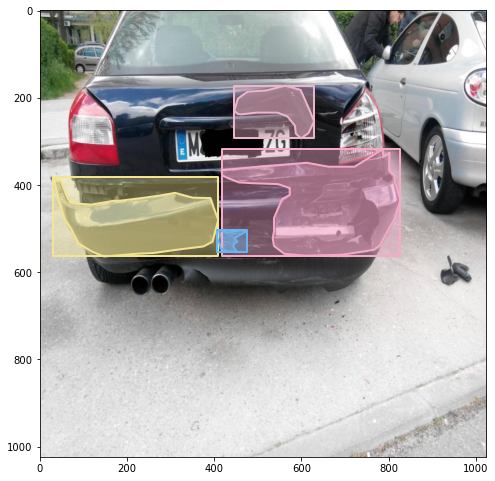

In [16]:
#Plot damages
plt.imshow(I)
plt.axis('on')
coco.showAnns(annotation_files, draw_bbox=True )

In [17]:
#get parts annotations
multiple_annotation_Ids = multiple_coco.getAnnIds(imgIds=image_Id,iscrowd=None)
multiple_annotation_files = multiple_coco.loadAnns(multiple_annotation_Ids)

In [18]:
print(multiple_annotation_Ids)

[15, 16, 17]


In [19]:
print(multiple_annotation_files)

[{'area': 4724.99999999999, 'bbox': [68, 179, 111, 174], 'category_id': 1, 'id': 15, 'image_id': 4, 'iscrowd': 0, 'segmentation': [[93, 179, 68, 227, 68, 281, 72, 344, 135, 353, 179, 353, 170, 256, 124, 210, 110, 189]]}, {'area': 13407.999999999984, 'bbox': [23, 375, 801, 230], 'category_id': 2, 'id': 16, 'image_id': 4, 'iscrowd': 0, 'segmentation': [[23, 383, 46, 394, 66, 440, 85, 448, 239, 432, 312, 421, 358, 437, 395, 433, 507, 415, 595, 415, 552, 456, 538, 486, 542, 519, 634, 518, 655, 532, 703, 517, 736, 517, 759, 545, 772, 492, 772, 445, 747, 429, 741, 411, 804, 395, 802, 375, 813, 383, 824, 437, 772, 553, 632, 572, 312, 567, 200, 605, 161, 601, 114, 563, 72, 509, 49, 444]]}, {'area': 11864.999999999973, 'bbox': [686, 174, 105, 176], 'category_id': 1, 'id': 17, 'image_id': 4, 'iscrowd': 0, 'segmentation': [[744, 174, 691, 253, 686, 350, 778, 326, 791, 310, 768, 218, 755, 192]]}]


In [20]:
# Create a dictionary between category_id and category name
category_map = dict()

for ele in list(multiple_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [21]:
print(category_map)

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}


Parts are: ['headlamp', 'rear_bumper', 'headlamp']


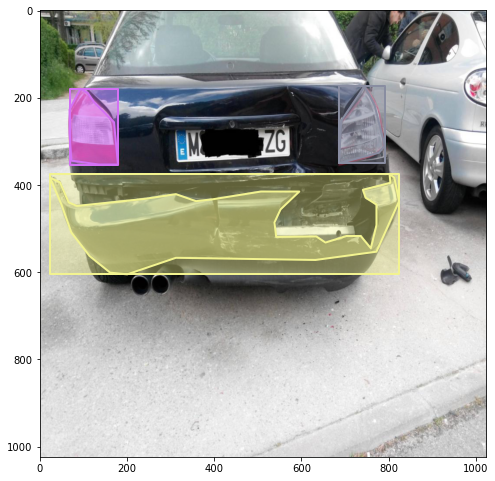

In [22]:
#Create a list of parts in the image
parts = []
for region in multiple_annotation_files:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts) 

#Plot Parts
I = io.imread(image_directory + '/' + image['file_name'])
plt.imshow(I)
plt.axis('on')
multiple_coco.showAnns(multiple_annotation_files, draw_bbox=True )

# Training Object detection model using Detectron 2

In [23]:
# Install detectron 2
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html
     |████████████████████████████████| 6.8 MB 691 kB/s 
     |████████████████████████████████| 46 kB 1.7 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210306-py3-none-any.whl size=57727 sha256=6e3567e960dafecd45780015fbf8569ac41646cb69a81a442176c86543c6bda1
  Stored in directory: /root/.cache/pip/wheels/1e/16/2c/62a568f6c8d294f0304528e78b8acbe1e1d57bbc3dc9cac26c
  Created wheel for iopath: filename=iopath-0.1.4-py3-none-any.whl size=15571 sha256=47c5f993ecbdc1f4ecf6c79d3d1a36be46933733f1695622064881b9e6020854
  Stored in directory: /root/.cache/pip/wheels/50/1d/d8/c56ebd0b2d2296b1e2b379d6e3cb94f6a40593a1ce1e2d8930
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl size=272645 sha256=913f0b2c931025fe12d87158501ef84507a72e46579d6fd03d7082eacba4abc1
  Stored in directory: /root/.cache/pip/wheels/bc/cf/1b/e95c99c5f9d1648be3f500ca55e7ce55f24818b

In [24]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.0 True


In [25]:
assert torch.__version__.startswith("1.7")

In [26]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

In [27]:
# To find out inconsistent CUDA versions, if there is not "failed" word in this output then things are fine.
!python -m detectron2.utils.collect_env

----------------------  ------------------------------------------------------------------------------
sys.platform            linux
Python                  3.7.9 | packaged by conda-forge | (default, Dec  9 2020, 21:08:20) [GCC 9.3.0]
numpy                   1.19.5
detectron2              0.3 @/opt/conda/lib/python3.7/site-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.2
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.0 @/opt/conda/lib/python3.7/site-packages/torch
PyTorch debug build     True
GPU available           True
GPU 0                   Tesla P100-PCIE-16GB (arch=6.0)
CUDA_HOME               /usr/local/cuda
Pillow                  7.2.0
torchvision             0.8.1 @/opt/conda/lib/python3.7/site-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5
fvcore                  0.1.3.post20210306
cv2                     4.5.1
----------------------  ---------

# Using Car damage dataset

In [28]:
dataset_directory = "../input/coco-car-damage-detection-dataset"
image_directory = "img/"
train_directory = "train/"
validation_directory = "val/"

In [29]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train", {}, os.path.join(dataset_directory,train_directory,"COCO_train_annos.json"), os.path.join(dataset_directory,image_directory))
register_coco_instances("car_dataset_validation", {}, os.path.join(dataset_directory,validation_directory,"COCO_val_annos.json"), os.path.join(dataset_directory,image_directory))

In [30]:
dataset_dictionaries = DatasetCatalog.get("car_dataset_train")
metadata_dictionaries = MetadataCatalog.get("car_dataset_train")

[03/09 07:09:51 d2.data.datasets.coco]: Loaded 59 images in COCO format from ../input/coco-car-damage-detection-dataset/train/COCO_train_annos.json


In [31]:
print(dataset_dictionaries)

[{'file_name': '../input/coco-car-damage-detection-dataset/img/10.jpg', 'height': 1024, 'width': 1024, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [300, 216, 79, 22], 'category_id': 0, 'segmentation': [[379, 216, 337, 218, 300, 223, 318, 238, 350, 237, 369, 231, 375, 227]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [226, 230, 62, 34], 'category_id': 0, 'segmentation': [[288, 230, 264, 238, 245, 249, 226, 264, 241, 264, 249, 253, 269, 253, 275, 250, 284, 238]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [161, 276, 65, 68], 'category_id': 0, 'segmentation': [[161, 331, 191, 326, 200, 276, 207, 315, 226, 322, 222, 337, 196, 344, 184, 342]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [254, 273, 67, 26], 'category_id': 0, 'segmentation': [[258, 273, 289, 273, 318, 275, 321, 289, 307, 299, 283, 296, 264, 291, 254, 285]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [233, 392, 123, 95], 'category_id': 0, 'segmentatio

In [32]:
print(metadata_dictionaries)

Metadata(evaluator_type='coco', image_root='../input/coco-car-damage-detection-dataset/img/', json_file='../input/coco-car-damage-detection-dataset/train/COCO_train_annos.json', name='car_dataset_train', thing_classes=['damage'], thing_dataset_id_to_contiguous_id={1: 0})


# Train this model

In [33]:
#Implementing my own Trainer Module here to use the COCO validation evaluation during training
# TODO: add data custom augmentation 
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [34]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_dataset_train",)
cfg.DATASETS.TEST = ("car_dataset_validation",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.WARMUP_ITERS = 700
cfg.SOLVER.MAX_ITER = 800 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (600, 800)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this  dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # only has one class (damage) + 1
cfg.MODEL.RETINANET.NUM_CLASSES = 2 # only has one class (damage) + 1
cfg.TEST.EVAL_PERIOD = 600



# Clear any logs from previous runs
#TODO add timestamp to logs
!rm -rf cfg.OUTPUT_DIR


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[03/09 07:09:55 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:07, 24.3MB/s]                           


[03/09 07:10:09 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.7/site-packages/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/opt/conda/lib/python3.7/site-packages/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/opt/conda/lib/python3.7/site-packages/detectron2/structures/masks.py:345: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzer

[03/09 07:10:19 d2.utils.events]:  eta: 0:05:22  iter: 19  total_loss: 2.411  loss_cls: 1.072  loss_box_reg: 0.3464  loss_mask: 0.6919  loss_rpn_cls: 0.1713  loss_rpn_loc: 0.02161  time: 0.4124  data_time: 0.0381  lr: 2.8116e-05  max_mem: 3191M
[03/09 07:10:27 d2.utils.events]:  eta: 0:05:18  iter: 39  total_loss: 2.051  loss_cls: 0.6938  loss_box_reg: 0.3801  loss_mask: 0.6844  loss_rpn_cls: 0.1924  loss_rpn_loc: 0.02441  time: 0.4208  data_time: 0.0153  lr: 5.6659e-05  max_mem: 3191M
[03/09 07:10:36 d2.utils.events]:  eta: 0:05:10  iter: 59  total_loss: 1.742  loss_cls: 0.4742  loss_box_reg: 0.4449  loss_mask: 0.6573  loss_rpn_cls: 0.125  loss_rpn_loc: 0.02318  time: 0.4204  data_time: 0.0210  lr: 8.5201e-05  max_mem: 3191M
[03/09 07:10:44 d2.utils.events]:  eta: 0:05:01  iter: 79  total_loss: 1.605  loss_cls: 0.4023  loss_box_reg: 0.4406  loss_mask: 0.6253  loss_rpn_cls: 0.07015  loss_rpn_loc: 0.0189  time: 0.4224  data_time: 0.0170  lr: 0.00011374  max_mem: 3191M
[03/09 07:10:53 d2

# Model Metrics and Hyper Parameters Visualization


In [35]:
def smooth(scalars, weight=0.6):
    """
    Reference: https://github.com/plotly/dash-live-model-training/blob/master/app.py#L163
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_validation = last * weight + (1 - weight) * point
        smoothed.append(smoothed_validation)
        last = smoothed_validation
    return smoothed


def plot(logdir: str, savedir: str, smoothing: float = 0.6, no_title=False, no_legend=False, no_axis_labels=False):
    """ re-draw the tf summary events plots  using seaborn
    :param logdir: Path to the directory having event logs
    :param savedir: Path to save the seaborn graphs
    :param smoothing: smoothing window space for the plots
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'
    
    plots = []
    
    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # we recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()
            _plt = sns.lineplot(x, y, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x, y_smooth, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())
        
        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return plots

In [36]:
plots = plot(logdir= './output', savedir= './')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

<Figure size 1152x648 with 0 Axes>

In [37]:
plots

['./seaborn/rpn/num_pos_anchors.png',
 './seaborn/rpn/num_neg_anchors.png',
 './seaborn/roi_head/num_fg_samples.png',
 './seaborn/roi_head/num_bg_samples.png',
 './seaborn/fast_rcnn/cls_accuracy.png',
 './seaborn/fast_rcnn/fg_cls_accuracy.png',
 './seaborn/fast_rcnn/false_negative.png',
 './seaborn/mask_rcnn/accuracy.png',
 './seaborn/mask_rcnn/false_positive.png',
 './seaborn/mask_rcnn/false_negative.png',
 './seaborn/data_time.png',
 './seaborn/total_loss.png',
 './seaborn/loss_cls.png',
 './seaborn/loss_box_reg.png',
 './seaborn/loss_mask.png',
 './seaborn/loss_rpn_cls.png',
 './seaborn/loss_rpn_loc.png',
 './seaborn/lr.png',
 './seaborn/time.png',
 './seaborn/eta_seconds.png',
 './seaborn/bbox/AP.png',
 './seaborn/bbox/AP50.png',
 './seaborn/bbox/AP75.png',
 './seaborn/bbox/APs.png',
 './seaborn/bbox/APm.png',
 './seaborn/bbox/APl.png',
 './seaborn/segm/AP.png',
 './seaborn/segm/AP50.png',
 './seaborn/segm/AP75.png',
 './seaborn/segm/APs.png',
 './seaborn/segm/APm.png',
 './seaborn

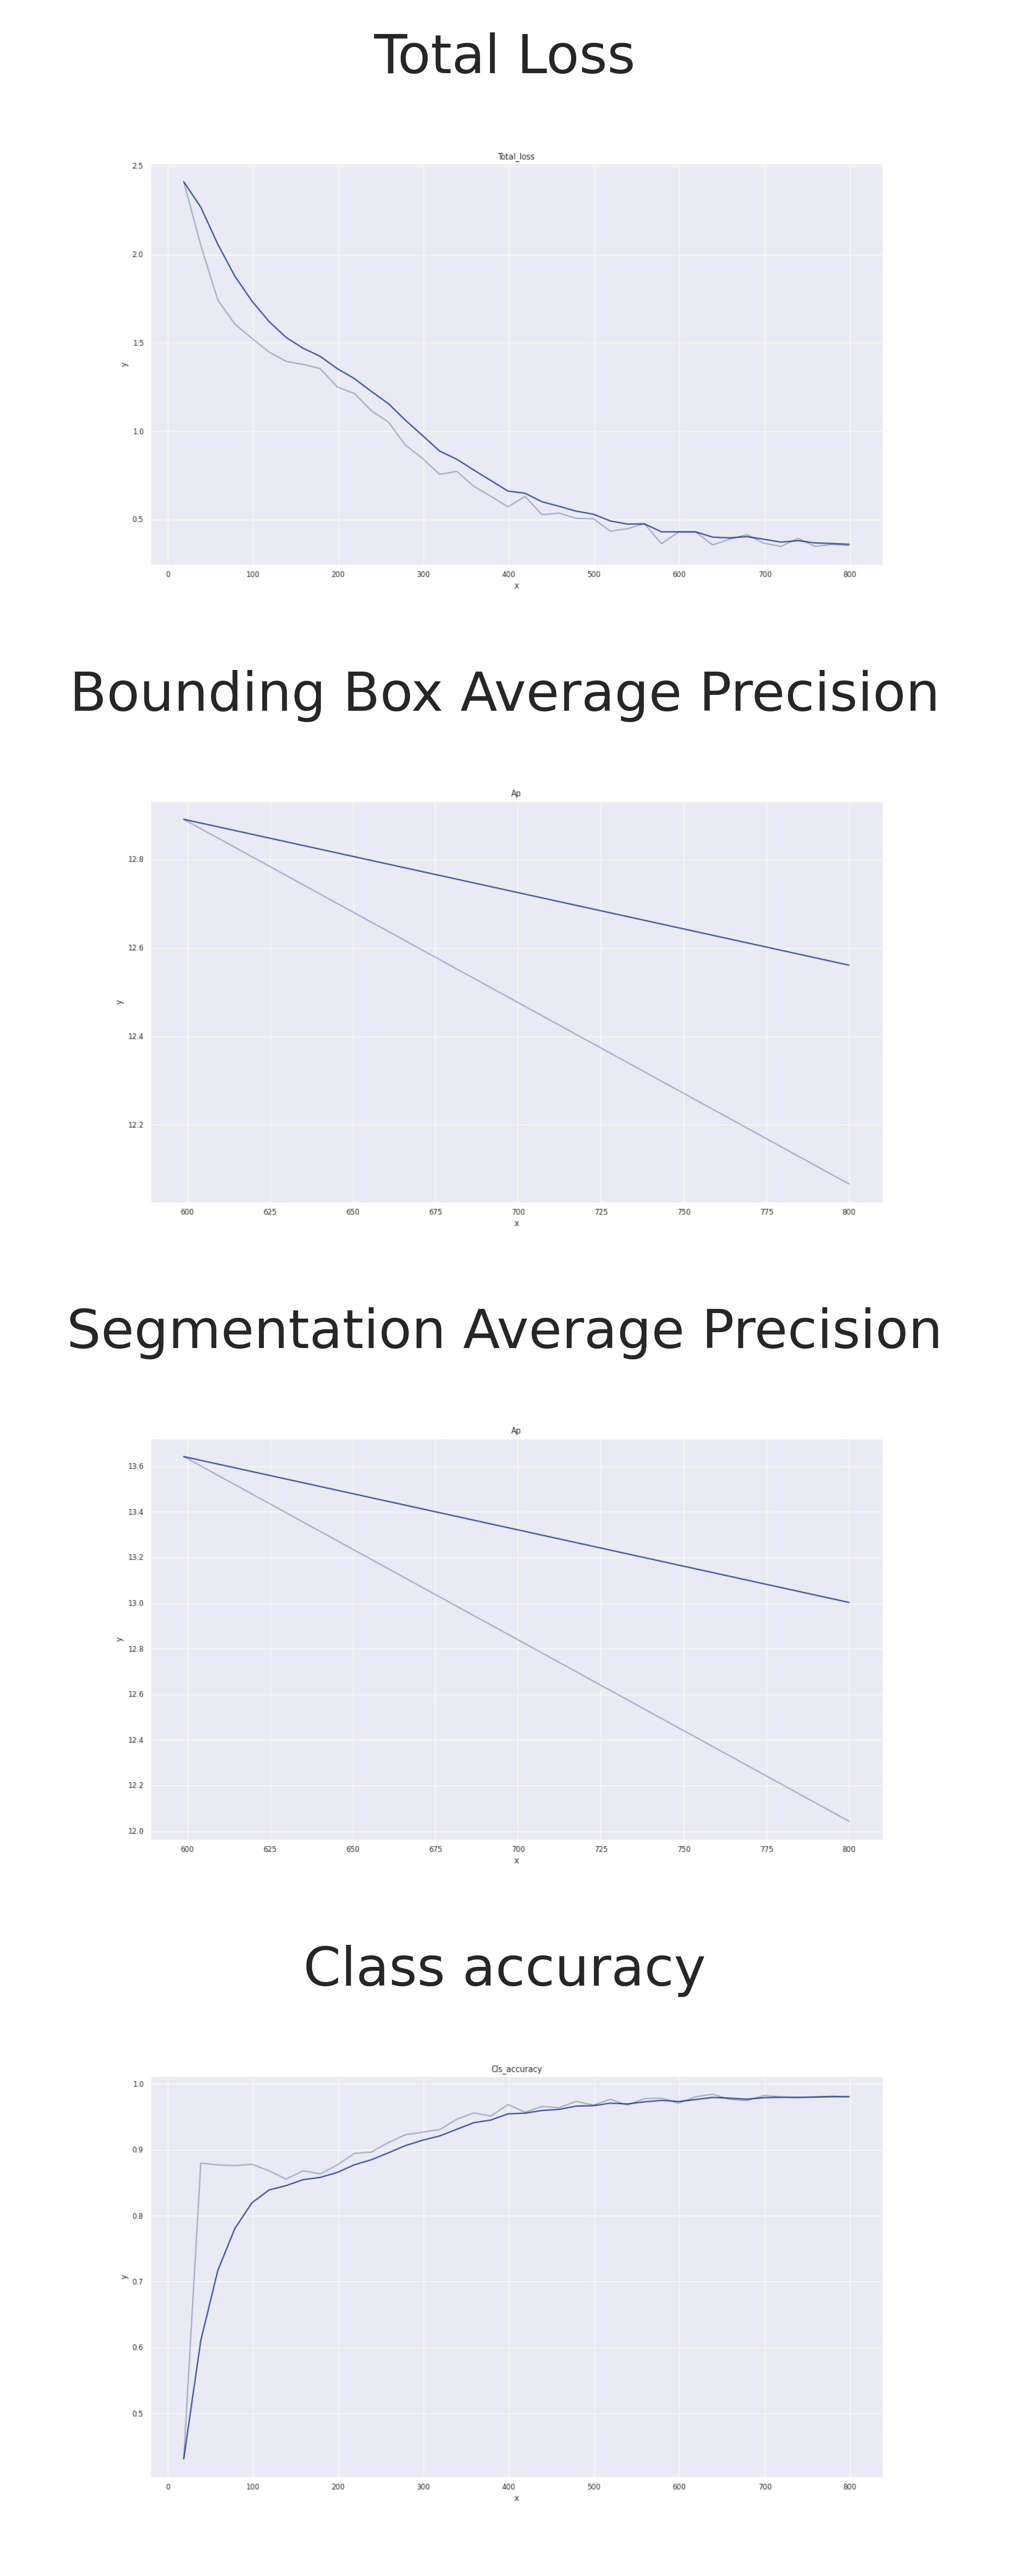

In [38]:
my_dpi = 1000
fig, ax = plt.subplots(4,1, figsize = (12,10), dpi=my_dpi)


ax[0].set_title('Total Loss', fontsize=12)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].imshow(Image.open('./seaborn/total_loss.png'))

ax[1].set_title('Bounding Box Average Precision', fontsize=12)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].imshow(Image.open('./seaborn/bbox/AP.png'))

ax[2].set_title('Segmentation Average Precision', fontsize=12)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].imshow(Image.open('./seaborn/segm/AP.png'))

ax[3].set_title('Class accuracy', fontsize=12)
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].imshow(Image.open('./seaborn/fast_rcnn/cls_accuracy.png'))

# Evaluate the Model

In [39]:
evaluator = COCOEvaluator("car_dataset_validation", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "car_dataset_validation")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

WARNING [03/09 07:16:22 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass tasks in directly
[03/09 07:16:22 d2.data.datasets.coco]: Loaded 11 images in COCO format from ../input/coco-car-damage-detection-dataset/val/COCO_val_annos.json
[03/09 07:16:22 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[03/09 07:16:22 d2.data.common]: Serializing 11 elements to byte tensors and concatenating them all ...
[03/09 07:16:22 d2.data.common]: Serialized dataset takes 0.01 MiB
[03/09 07:16:22 d2.evaluation.evaluator]: Start inference on 11 images
[03/09 07:16:24 d2.evaluation.evaluator]: Inference done 11/11. 0.0559 s / img. ETA=0:00:00
[03/09 07:16:24 d2.evaluation.evaluator]: Total inference time: 0:00:00.591755 (0.098626 s / img per device, on 1 devices)
[03/09 07:16:24 d2.evaluation.evaluator]: Total inference pure 

# Finding some inferences from this model

In [40]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("car_dataset_validation", )
predictor = DefaultPredictor(cfg)

In [41]:
valid_dataset_dictionaries = DatasetCatalog.get("car_dataset_validation")
valid_metadata_dictionaries = MetadataCatalog.get("car_dataset_validation")

[03/09 07:16:26 d2.data.datasets.coco]: Loaded 11 images in COCO format from ../input/coco-car-damage-detection-dataset/val/COCO_val_annos.json


In [42]:
print(valid_dataset_dictionaries)

[{'file_name': '../input/coco-car-damage-detection-dataset/img/1.jpg', 'height': 1024, 'width': 1024, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [364, 143, 190, 490], 'category_id': 0, 'segmentation': [[454, 143, 388, 296, 364, 424, 375, 505, 422, 597, 495, 633, 516, 577, 554, 489, 539, 349, 550, 259, 539, 210, 521, 166, 495, 150]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [391, 622, 172, 202], 'category_id': 0, 'segmentation': [[528, 622, 505, 675, 392, 675, 391, 712, 409, 778, 432, 824, 477, 822, 528, 785, 560, 729, 563, 688, 548, 662, 537, 647]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}, {'file_name': '../input/coco-car-damage-detection-dataset/img/22.jpg', 'height': 1024, 'width': 1024, 'image_id': 1, 'annotations': [{'iscrowd': 0, 'bbox': [626, 318, 179, 261], 'category_id': 0, 'segmentation': [[626, 326, 673, 318, 730, 337, 765, 370, 798, 406, 803, 440, 797, 466, 797, 491, 805, 522, 794, 579, 784, 543, 777, 505, 761, 468, 730, 423, 700, 388, 668, 363, 6

In [43]:
print(valid_metadata_dictionaries)

Metadata(evaluator_type='coco', image_root='../input/coco-car-damage-detection-dataset/img/', json_file='../input/coco-car-damage-detection-dataset/val/COCO_val_annos.json', name='car_dataset_validation', thing_classes=['damage'], thing_dataset_id_to_contiguous_id={1: 0})


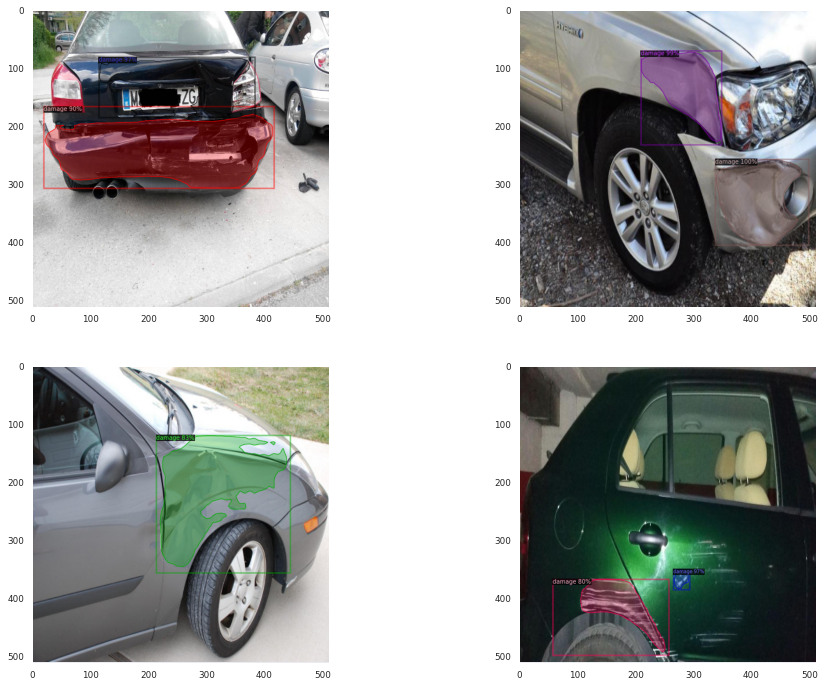

In [44]:
fig, ax = plt.subplots(2, 2, figsize =(16,12))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1] ]
i=-1
for d in random.sample(valid_dataset_dictionaries, 4):
    i=i+1    
    im = io.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=valid_metadata_dictionaries, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])